In [1]:
import numpy as np
from tensorflow.keras.layers import Input, Dense, Reshape, LSTM
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import MeanAbsoluteError
from matplotlib import pyplot as plt 

#### Creo il dataset 
* i dati di train che vanno da 0 a 6
* i dati di test da 5 a 100

#### In questo modo il modello non e' in grado di generalizzare sui dati ottenuti 

In [2]:
feat_number = 100

x = np.zeros((1000, feat_number))
y = np.zeros(1000)

for i in range(1000):
    rand = np.random.randint(0, 6)
    while np.sum(x[i]) < rand:
        rand_2 = np.random.randint(feat_number)
        x[i, rand_2] = 1
    y[i] = rand

x_test = np.zeros((200, feat_number))
y_test = np.zeros(200)

for i in range(200):
    rand = np.random.randint(5, feat_number)
    while np.sum(x_test[i]) < rand:
        rand_2 = np.random.randint(feat_number)
        x_test[i, rand_2] = 1
    y_test[i] = rand

#### funzione per il fit con illustrazione dei risultati di addestramento 

In [3]:
def train_and_test(model, epochs=10, name=None):
    history = model.fit(
        x=x[:900],
        y=y[:900],
        validation_data=(x[900:], y[900:]),
        batch_size=50,
        verbose=0,
        epochs=epochs
    )

    test_results = model.evaluate(x_test, y_test, verbose=0, batch_size=128)

    plt.title(name)
    plt.plot(history.history['loss'], label='Loss')
    plt.plot(history.history['val_loss'], label='Val.Loss')
    plt.legend()
    plt.show()

    print('---------------------------------')
    print('LOSSES')
    print('train     ', history.history['loss'][-1])
    print('validation', history.history['val_loss'][-1])
    print('test      ', test_results)
    print('---------------------------------\n\n')

#### Funzione con architettura del modello in qui utilizzeremo piu celle per diverse architetture con diverse funzioni di attivazione 
* Dense
* LSTM
  

In [4]:
def get_model(cell='dense', activation='sigmoid', layers=1):
    try:
        feat_number = len(x[0])
    except TypeError:
        feat_number = 1
    input = Input(shape=(feat_number))
    if cell == 'dense':
        out = Dense(32, activation=activation)(input)
        for i in range(layers - 1):
            out = Dense(32, activation=activation)(out)
    if cell == 'lstm':
        out = Reshape(target_shape=(1, feat_number))(input)
        if layers > 1:
            out = LSTM(32, return_sequences=True)(out)
            for i in range(layers - 2):
                out = LSTM(32, return_sequences=True)(out)
            out = LSTM(32)(out)
        else:
            out = LSTM(32)(out)

    output = Dense(1)(out)
    model = Model(inputs=input, outputs=output)
    model.compile(optimizer=SGD(), loss=MeanAbsoluteError())
    train_and_test(model, epochs=200, name=cell + ' - ' + activation)

#### Illustrazione risultati di addestramento 
il modello essendo non lineare non riesce a generalizzare su dati lineari avendo un dataset di test con valori differenti da quello di train 

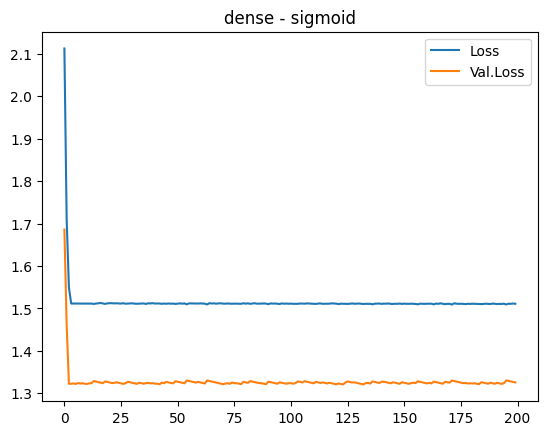

---------------------------------
LOSSES
train      1.5110127925872803
validation 1.3255221843719482
test       51.361473083496094
---------------------------------




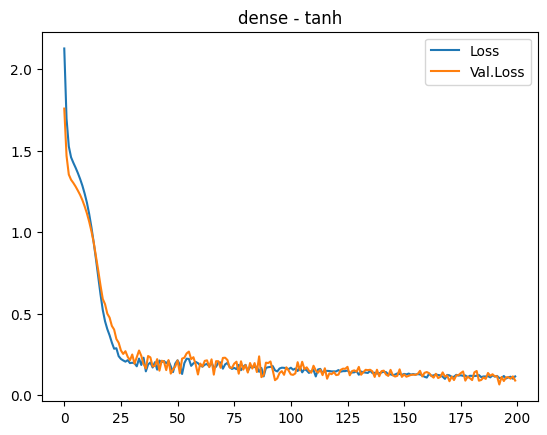

---------------------------------
LOSSES
train      0.11560075730085373
validation 0.0902484729886055
test       46.21597671508789
---------------------------------




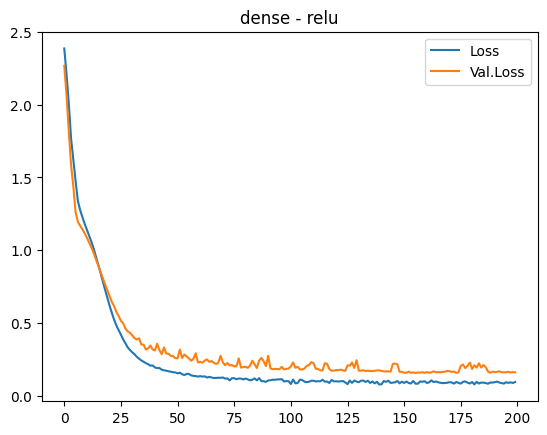

---------------------------------
LOSSES
train      0.09588941186666489
validation 0.16181549429893494
test       3.432342529296875
---------------------------------




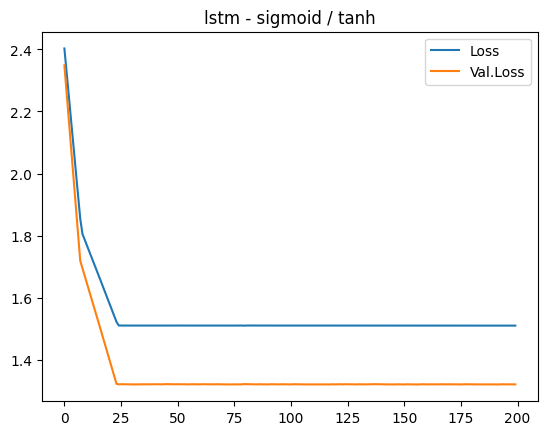

---------------------------------
LOSSES
train      1.5096170902252197
validation 1.3201297521591187
test       51.424346923828125
---------------------------------




In [5]:
get_model('dense', 'sigmoid', layers=3)
get_model('dense', 'tanh', layers=3)
get_model('dense', 'relu', layers=3)
get_model('lstm', 'sigmoid / tanh', layers=3)

#### Creo un altro dataset di 1000 elementi dove 900 sono valori tra 0 e 0.1 e varranno utilizzati per il train e gli altri 100 sono valori tra 0 e 1 e saranno utilizzati per il test

In [6]:
x = np.zeros((1000, 2))
y = np.zeros((1000))

for i in range(1000):
    x[i][0] = np.random.random(1) * 0.1
    x[i][1] = np.random.random(1) * 0.1
    y[i] = x[i][0] + x[i][1]

x_train = x[:900]
y_train = y[:900]

x_val = x[900:]
y_val = y[900:]

x_test = np.zeros((100, 2))
y_test = np.zeros((100))

for i in range(100):
    x_test[i][0] = np.random.random(1)
    x_test[i][1] = np.random.random(1)
    y_test[i] = x_test[i][0] + x_test[i][1]

#### Illustrazione risultati di addestramento

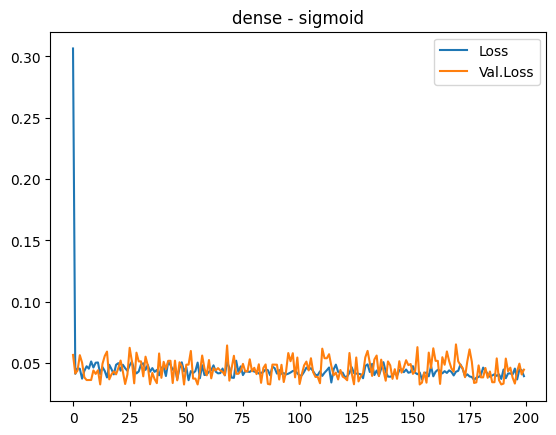

---------------------------------
LOSSES
train      0.03938712179660797
validation 0.044707708060741425
test       0.9745409488677979
---------------------------------




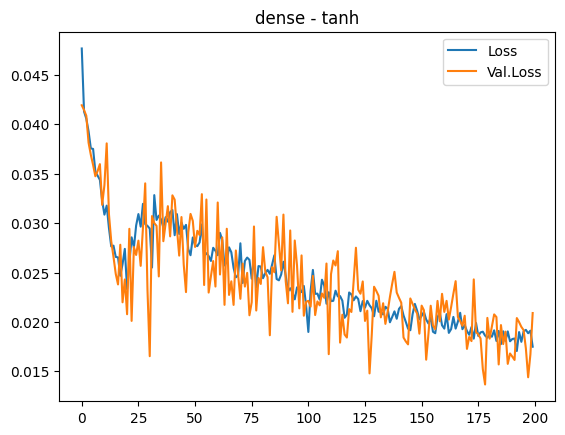

---------------------------------
LOSSES
train      0.017491821199655533
validation 0.020899424329400063
test       0.3269585371017456
---------------------------------




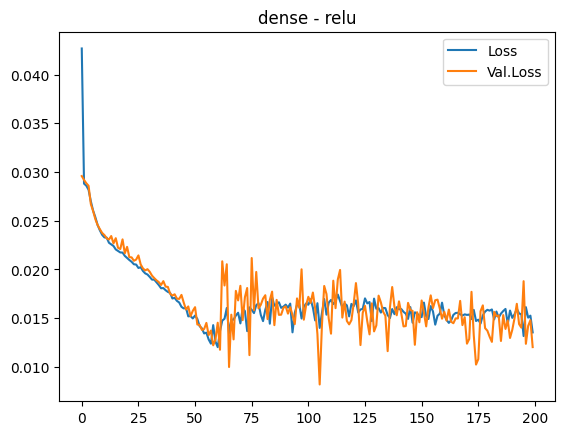

---------------------------------
LOSSES
train      0.013528776355087757
validation 0.01202008593827486
test       0.7731845378875732
---------------------------------




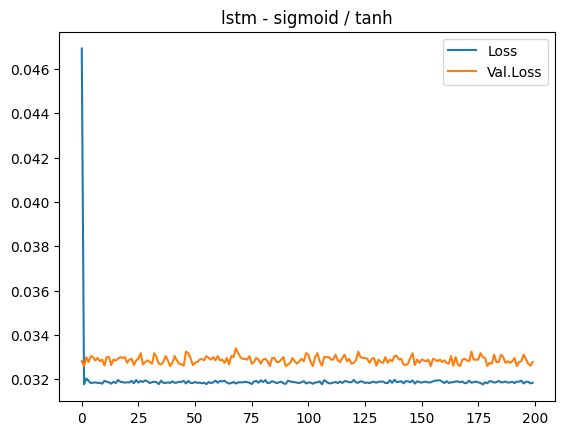

---------------------------------
LOSSES
train      0.03183779865503311
validation 0.03277174010872841
test       0.9412391781806946
---------------------------------




In [7]:
get_model('dense', 'sigmoid', layers=3)
get_model('dense', 'tanh', layers=3)
get_model('dense', 'relu', layers=3)
get_model('lstm', 'sigmoid / tanh', layers=3)

#### Funzione identita' ( (x) = x )

In [8]:
x = np.random.uniform(0.35, 0.65, 1000)
y = x[:]

x_train = x[:900]
y_train = y[:900]
x_val = x[900:]
y_val = y[900:]

x_test = np.concatenate((np.random.uniform(0.01, 0.4, 100), np.random.uniform(0.6, 0.99, 100)))
np.random.shuffle(x_test)
y_test = x_test[:]

#### Illustrazione risultati di addestramento

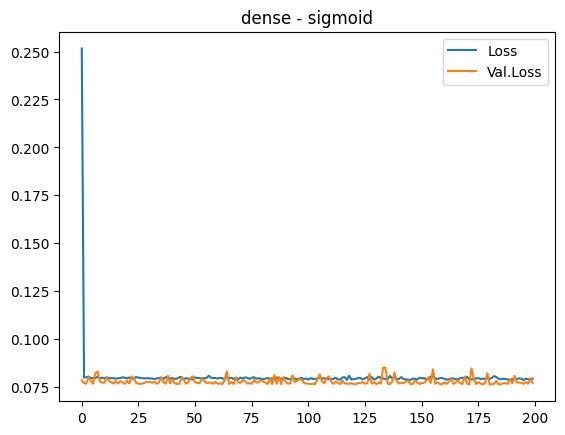

---------------------------------
LOSSES
train      0.079177126288414
validation 0.07702543586492538
test       0.2875383496284485
---------------------------------




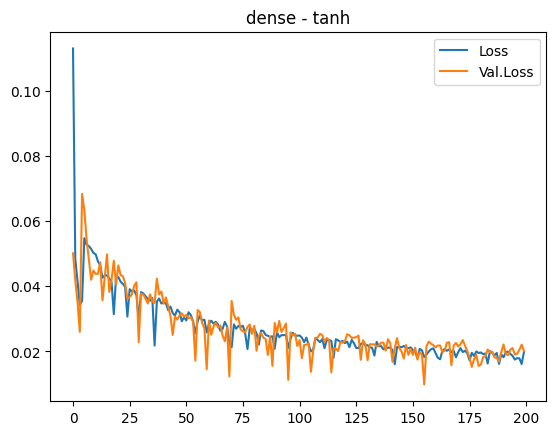

---------------------------------
LOSSES
train      0.019823430106043816
validation 0.020203035324811935
test       0.032523445785045624
---------------------------------




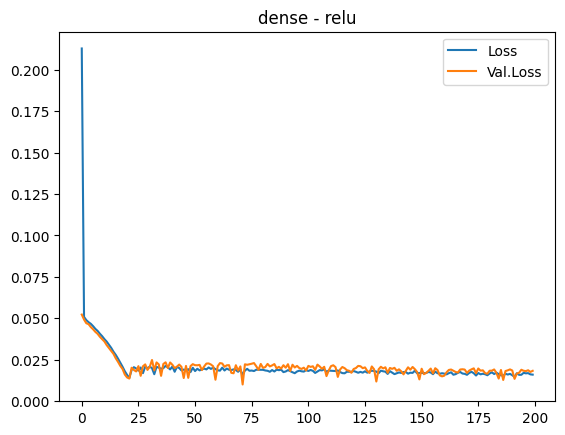

---------------------------------
LOSSES
train      0.015954062342643738
validation 0.018265020102262497
test       0.060208216309547424
---------------------------------




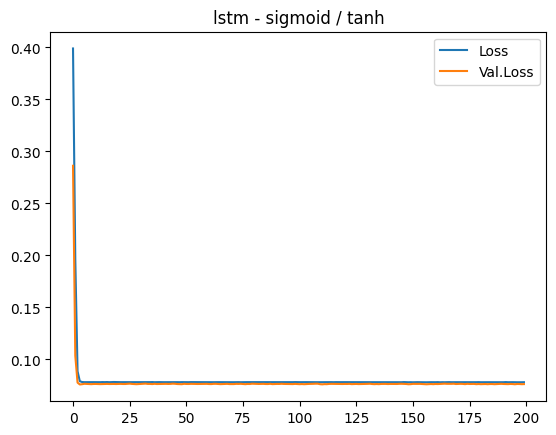

---------------------------------
LOSSES
train      0.07817400246858597
validation 0.0763508677482605
test       0.2867477834224701
---------------------------------




In [9]:
get_model('dense', 'sigmoid', layers=3)
get_model('dense', 'tanh', layers=3)
get_model('dense', 'relu', layers=3)
get_model('lstm', 'sigmoid / tanh', layers=3)

### Implementazione relazioni lineari

In [10]:
def my_function(x1, x2):
    return 1.3 * x1 * x1 + 3.3 * x2 + 2.5

examples_number = 5000
train_val_split = 4500

x = np.zeros((examples_number, 2), dtype='float32')
y = np.zeros((examples_number, 1), dtype='float32')

for i in range(examples_number):
    x1 = np.random.random(1) * 0.1 + 0.0001
    x2 = np.random.random(1) * 0.1 + 0.0001

    f = my_function(x1, x2)

    x[i][0] = x1
    x[i][1] = x2
    y[i][0] = f

x_train = x[:train_val_split]
y_train = y[:train_val_split]

x_val = x[train_val_split:]
y_val = y[train_val_split:]

In [11]:
x_test = np.zeros((2000, 2), dtype='float32')
y_test = np.zeros((2000, 1), dtype='float32')

for i in range(2000):
    x1 = np.random.random(1) * 0.42 + 0.0001
    x2 = np.random.random(1) - 0.5 + 0.0001

    f = my_function(x1, x2)

    x_test[i][0] = x1
    x_test[i][1] = x2
    y_test[i][0] = f

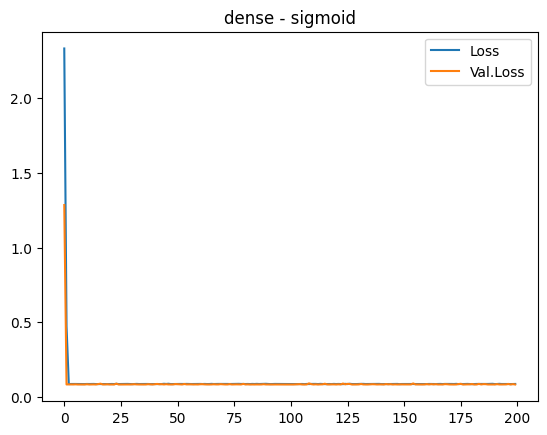

---------------------------------
LOSSES
train      0.08644934743642807
validation 0.08304458856582642
test       0.8361189961433411
---------------------------------




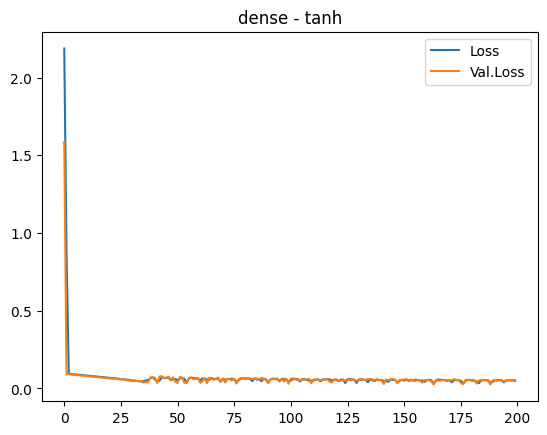

---------------------------------
LOSSES
train      0.04904267191886902
validation 0.05307558551430702
test       0.25693652033805847
---------------------------------




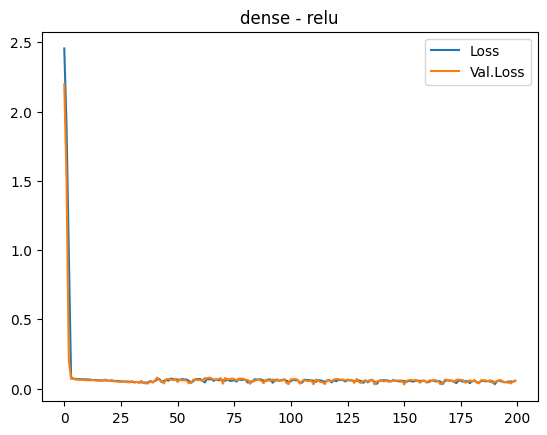

---------------------------------
LOSSES
train      0.057024430483579636
validation 0.053907256573438644
test       0.43519559502601624
---------------------------------




In [ ]:
get_model('dense', 'sigmoid', layers=3)
get_model('dense', 'tanh', layers=3)
get_model('dense', 'relu', layers=3)
get_model('lstm', 'sigmoid / tanh', layers=3)